In [3]:
import pymysql
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

# Load environment variables
load_dotenv()

# Get database connection details from environment variables
DB_HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_NAME = os.getenv('DB_NAME')

# Connect to the MySQL database
connection = pymysql.connect(
    host=DB_HOST,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME
)

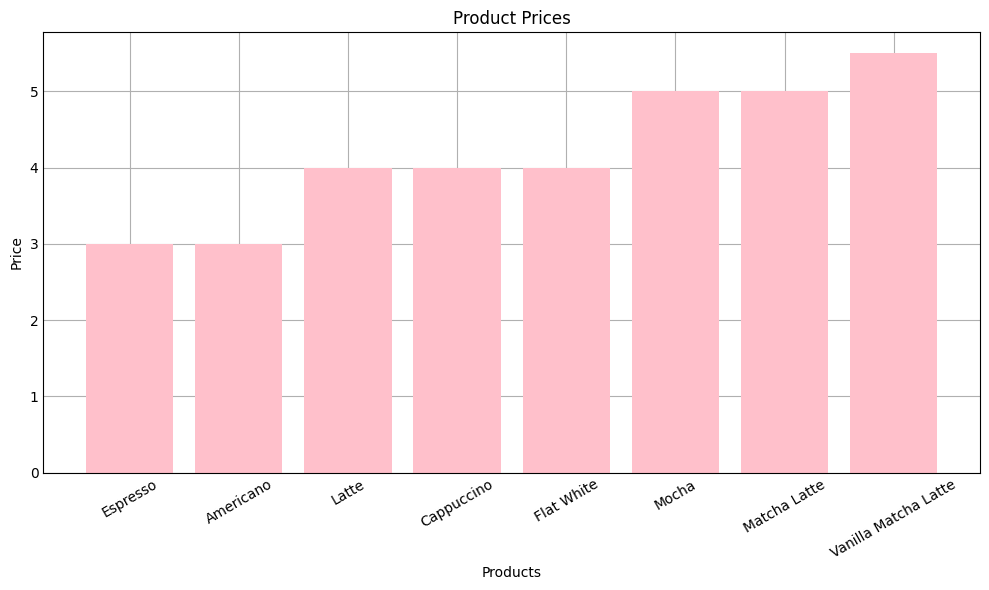

In [4]:
def visualise_product_prices():
    try:
        with connection.cursor() as cursor:
            cursor.execute("SELECT item, price FROM products")
            products = cursor.fetchall()
        
        # Extract data for plotting
        items = [product[0] for product in products]
        prices = [product[1] for product in products]

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.bar(items, prices, color='pink')
        plt.xlabel('Products')
        plt.ylabel('Price')
        plt.title('Product Prices')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    except pymysql.MySQLError as e:
        print(f"Error reading products from database: {e}")

# Call the function to visualize product prices
visualise_product_prices()